/tmp/ipython-input-1-246100360.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01', periods=len(sales), freq='M')


Autocorrelation (Lag 1): 0.66
Autocorrelation (Lag 2): 0.76


/tmp/ipython-input-1-246100360.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Lag 1', 'Lag 2'], y=[autocorr_lag1, autocorr_lag2], palette='Blues_d')


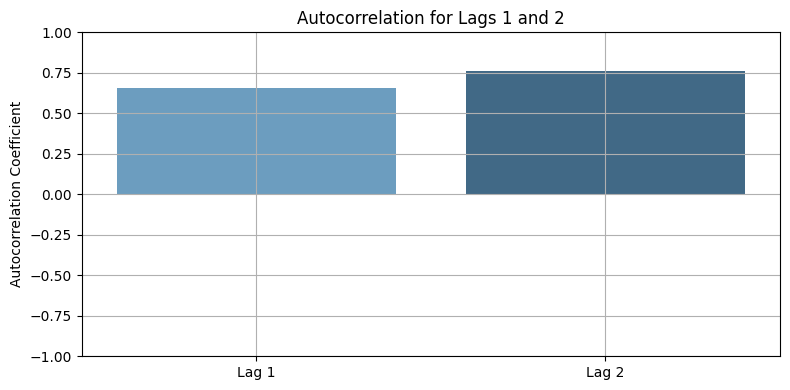

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = np.array([20, 24, 22, 26, 25, 28, 30, 27, 29, 31])
months = pd.date_range(start='2023-01', periods=len(sales), freq='M')
df = pd.DataFrame({'Month': months, 'Sales': sales})
df.set_index('Month', inplace=True)

# Lagged columns
df['Lag_1'] = df['Sales'].shift(1)
df['Lag_2'] = df['Sales'].shift(2)

# Autocorrelation calculation
autocorr_lag1 = df['Sales'].autocorr(lag=1)
autocorr_lag2 = df['Sales'].autocorr(lag=2)

print(f"Autocorrelation (Lag 1): {autocorr_lag1:.2f}")
print(f"Autocorrelation (Lag 2): {autocorr_lag2:.2f}")

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=['Lag 1', 'Lag 2'], y=[autocorr_lag1, autocorr_lag2], palette='Blues_d')
plt.title('Autocorrelation for Lags 1 and 2')
plt.ylabel('Autocorrelation Coefficient')
plt.ylim(-1, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


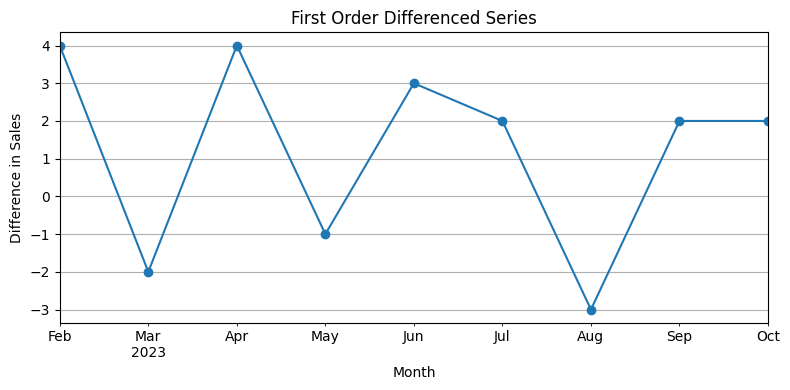

In [2]:
df['Sales_diff'] = df['Sales'].diff()
df['Sales_diff'].dropna().plot(title='First Order Differenced Series', figsize=(8, 4), marker='o')
plt.grid(True)
plt.ylabel('Difference in Sales')
plt.tight_layout()
plt.show()
